# Programmation orientée objet

Comment créer se propres objets en Python. 

## Vocabulaire

En python tout ce que l'on manipule est un objet : 
* Nombre, liste, dictionnaire, ...
* Tableau numpy
* Fonction, module, ....

Un objet possède des **attributs**. Exemple : 

    z = 1.1J
    z.real
    a = np.array([1, 2, 4])
    a.shape
    
Un objet possède des **méthodes**. Exemple :

    a.mean()
    a.conjugate()
    z.conjugate()
    
Les méthodes sont des fonctions attachées à l'objet. La méthode conjugate d'un tableau n'est pas la même que la méthode conjugate d'un complexe

## Comment créer un objet

### Créer un nombre complexe


In [5]:
import numbers
import math
import numpy as np

class Complexe:
    def __init__(self, re, im):
        self.re = re
        self.im = im
        
    def conjugate(self):
        return Complexe(self.re, -self.im)
    
    def __repr__(self):
        return f"Complexe({self.re}, {self.im})"

    def __str__(self):
        if self.im>0:
            return f"{self.re} + {self.im}J"
        elif self.im<0:
            return f"{self.re} - {-self.im}J"
        else:
            return f"{self.re}"
        
    def __add__(self, other):
        other = self._make_other_complexe(other)
        if isinstance(other, Complexe):
            return Complexe(self.re + other.re, self.im + other.im)
        return NotImplemented
    
    def __radd__(self, other):
        return self + other
    
    def __eq__(self, other):
        other = self._make_other_complexe(other)
        if isinstance(other, Complexe):
            return math.isclose(self.re, other.re) and math.isclose(self.im, other.im)
        return NotImplemented
        
    @staticmethod
    def _make_other_complexe(other):
#        if isinstance(other, int) or isinstance(other, float):
#        if isinstance(other, (int, float)):
        if isinstance(other, numbers.Real):
            other = Complexe(other, 0)
        return other
    
    def __mul__(self, other):
        other = self._make_other_complexe(other)
        if isinstance(other, Complexe):
            return Complexe(self.re*other.re - self.im*other.im,
                           self.re*other.im + self.im*other.re)
        return NotImplemented
    
    @property
    def r(self):
        return np.abs(self.re**2 + self.im**2)
    
    @property
    def theta(self):
        return math.atan2(self.im, self.re)

In [6]:
z1 = Complexe(1, 2)
z2 = Complexe(3, -1.4)

print(z1 + z2)
z1+z2 == Complexe(4, 0.6)

4 + 0.6000000000000001J


True

In [7]:
import math
z1 = Complexe(1/2, math.sqrt(3)/2)
z1*z1*z1

Complexe(-0.9999999999999998, 1.1102230246251565e-16)

In [8]:
z1.r
z1.theta

1.0471975511965976

In [9]:
2 + z1 # z1.__radd__(2)

Complexe(2.5, 0.8660254037844386)

#### Les décorateurs

In [10]:
def dit_bonjour(f):
    def nouvelle_fonction(*args, **kwd):
        print('Bonjour')
        return f(*args, **kwd)
    return nouvelle_fonction

@dit_bonjour
def f(x, y):
    return x + y

# f = dit_bonjour(f)


@dit_bonjour
def g(x, y):
    return x * y


f(1, 2)


g(3, 4)

Bonjour
Bonjour


12

### Instrumentation

Exemple : oscilloscope (c.f. TP)

In [11]:
from fake_scpi import FakeSCPI
inst = FakeSCPI()

def set_frequency(inst, freq=1000):
    command = f'FREQ {freq:.3f}'
    inst.write(command)

def get_frequency(inst):
    command = f'FREQ?'
    return float(inst.query(command))

def get_model_identification(inst):
    res = inst.query("*IDN?")
    comp, model, serial, _ = res.split(',') 
    dic = {'compagnie':comp,
          'model':model,
          'serial':serial}
    return dic

set_frequency(inst, 100)
get_frequency(inst)
get_model_identification(inst)

{'compagnie': 'TEKTRONIX', 'model': 'DPO3014', 'serial': 'C012048'}

In [12]:
class Instrument(object):
    def __init__(self, conn):
        self._conn = conn
        
    def get_model_identification(self):
        res = self._conn.query("*IDN?")
        comp, model, serial, _ = res.split(',') 
        dic = {'compagnie':comp,
              'model':model,
              'serial':serial}
        return dic

    
class TektronixGBF(Instrument):
    def set_frequency(self, freq=1000):
        command = f'FREQ {freq:.3f}'
        self._conn.write(command)

    def get_frequency(self):
        command = f'FREQ?'
        return float(self._conn.query(command))
    
    frequency = property(get_frequency, set_frequency)
        
class AgilentGBF(Instrument):
    def set_frequency(self, freq=1000):
        command = f'FRE {freq:.3f}'
        self._conn.write(command)

    def get_frequency(self):
        command = f'FRE?'
        return float(self._conn.query(command))

gbf = TektronixGBF(FakeSCPI())

In [13]:
gbf.set_frequency(56)
print(gbf.get_frequency())

56.0


In [14]:
gbf.frequency = 10
print(gbf.frequency)

10.0


In [15]:
class Test:
    def __init__(self, a):
        self.a = a

    @classmethod
    def load(cls):
        return cls(2)
    
def load():
    return Test(2)

In [16]:
Test.load()

### Exercice : vecteur3D

### Exercice : livre et bibliographie

## Nouveaux concepts



### Méthodes spéciales

- `__init__`
- `__repr__`, `__str__`

Lorsque c'est possible, `__repr__` doit représenté au mieux l'objet. Souvent il s'agit d'une chaine de caractère qui en étant évaluée renvoie un objet similaire. La méthode `__str__` renvoie `__repr__` par défaut. Sinon, elle doit être plus simple.

Opérateur unaire et binaire

- `__neg__`
- `__add__`, `__sub__`, `__mul__`, `__truediv__`, `__mod__`, `__pow__`
- `__radd__`, ...
- `__eq__` (==), `__ne__` (!=), `__lt__` (<), `__le__` (<=), `__gt__`, `__ge__`
- `__or__` (|), `__and__` (&), `__xor__`(^)


Emulateur de contenu

- a[key] => `a.__getitem__(key)`
- a[key] = val => `a.__setitem__(key, val)`
- del a[key] => `a.__delitem__(key)`
- len(a) => `a.__len__()`
- for elm in a => `for elm in a.__iter__()`

### Attributs et property

- Attributs de class vs attributs d'objets
- property

### Héritage

- isinstance permet de tester si un objet est une instance d'une classe. 

### Circuit électrique

![circuit](kicad.sch.png "Exemple de circuit")

Objectif : faire comprendre à Python ce circuit pour pouvoir ensuite faire des calculs. Ici, on demandera de calculer l'impédance complexe à une fréquence donnée.

Stucture en arbre : 
<code>
Serie :
    |- Parallel:
    |   |-inductance
    |   |-resistance
    |   |-condensateur
    |- resistance
</code>


Il y a plusieurs objets de nature différente donc de classe différente (résistance, condensateur, circuit parallèle, ...). Mais ces objets sont tous des circuits bibolaires. Tous ces objets devront mettre en oeuvre un méthode pour calculer leur impédance à une fréquence donnée. 

Code final en Python (objectif à atteindre pour que l'objet soit le plus simple à utiliser):

    R1 = Resistance(10)
    R2 = Resistance(5)
    L1 = Inductance(15E-6)
    C1 = Condensateur(10E-6)

    circuit = R2 + (L1|R1|C1)
    
    print(circuit.impedance(50))
    isinstance(R1, CircuitBipolaire) # True
    isinstance(circuit, CircuitBipolaire) # True    




In [17]:
import math
import sympy

class CircuitBipolaire(object):
    def admittance(self, freq):
        return 1/self.impedance(freq)
    
    def __add__(self, other):
        return Serie(self, other)

    def __or__(self, other):
        return Parallel(self, other)
    
class CircuitElementaire(CircuitBipolaire):
    def __init__(self, val):
        self.val = val
    
    def __repr__(self):
        return f'{self.__class__.__name__}({self.val})' 
    
    def __str__(self):
        initiale = self.__class__.__name__[0]
        return f'{initiale}({self.val})' 


class Resistance(CircuitElementaire):
    def impedance(self, freq):
        return self.val

class Condensateur(CircuitElementaire):
    def impedance(self, freq):
        if isinstance(self.val, sympy.Expr):
            return 1/(2*self.val*sympy.pi*freq*sympy.I)
        else:
            return 1/(2*self.val*math.pi*freq*1J)
    
class Inductance(CircuitElementaire):
    def impedance(self, freq):
        if isinstance(self.val, sympy.Expr):
            return (2*self.val*sympy.pi*freq*sympy.I)
        else:
            return (2*self.val*math.pi*freq*1J)

    
class CircuitCompose(CircuitBipolaire):
    def __init__(self, circ1, circ2):
        self.circ1 = circ1
        self.circ2 = circ2
        
    def __repr__(self):
        return f'{self.__class__.__name__}({self.circ1!r}, {self.circ2!r})' 

class Parallel(CircuitCompose):
    def impedance(self, freq):
        #return 1/(self.circ1.admittance(freq) + self.circ2.admittance(freq))
        Z1, Z2 = self.circ1.impedance(freq), self.circ2.impedance(freq)
        return Z1*Z2/(Z1+Z2)
        
    def __str__(self):
        return f'({self.circ1!s} | {self.circ2!s})'

class Serie(CircuitCompose):
    def impedance(self, freq):
        return self.circ1.impedance(freq) + self.circ2.impedance(freq)

    def __str__(self):
        return f'({self.circ1!s} + {self.circ2!s})'

    

R1 = Resistance(10)
C1 = Condensateur(10E-6)
print(R1) # R(10)
Parallel(R1, C1).impedance(1000)
R1|C1

R(10)


Parallel(Resistance(10), Condensateur(1e-05))

In [18]:
R1 = Resistance(10)
R2 = Resistance(5)
L1 = Inductance(15E-6)
C1 = Condensateur(10E-6)

circuit = R2 + (L1|R1|C1)
print(circuit)

(R(5) + ((I(1.5e-05) | R(10)) | C(1e-05)))


Text(0.5, 0, 'Frequency (Hz)')

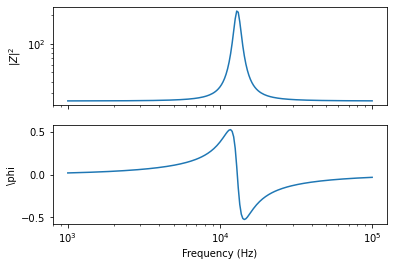

In [19]:
import numpy as np
from matplotlib.pyplot import figure
fig = figure()
ax1, ax2 = fig.subplots(2, 1, sharex=True)

Tfreq = np.logspace(3, 5, 201)
Z = circuit.impedance(Tfreq)

ax1.loglog(Tfreq, np.abs(Z)**2)
ax1.set_ylabel('$|Z|^2$')
ax2.semilogx(Tfreq, np.angle(Z))
ax2.set_ylabel('\phi')
ax2.set_xlabel('Frequency (Hz)')


In [20]:
from sympy import *

R1 = Resistance(Symbol('R1'))
R2 = Resistance(Symbol('R2'))
L1 = Inductance(Symbol('L1'))
C1 = Condensateur(Symbol('C1'))

L2 = Inductance(Symbol('L2'))
C2 = Condensateur(Symbol('C2'))

circuit = R2 + (L1|R1|C1)
circuit

Serie(Resistance(R2), Parallel(Parallel(Inductance(L1), Resistance(R1)), Condensateur(C1)))

In [21]:
freq = Symbol('omega')/(2*sympy.pi)
simplify(circuit.impedance(freq))

I*(L1*R1*omega - I*R2*(-C1*L1*R1*omega**2 + I*L1*omega + R1))/(-C1*L1*R1*omega**2 + I*L1*omega + R1)